# Project: Seattle Airbnb

> For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from Airbnb available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data.

I chose Airbnb data in Seattle, and have the following three questions:

- What is the seasonal pattern of Airbnb in Seattle?

- What kinds of Airbnb homes are popular?

- What are the most influential inner features about the rental price?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
cal = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/calendar.csv')
lst = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/listings.csv')
rev = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/reviews.csv')

## Data understanding

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Seasonal Pattern 

What is the seasonal pattern of Airbnb in Seattle?

In [9]:
# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

In [10]:
def timeplot(data, feat, title):
    """
    draw a smooth line for the time series of feature
    """
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    # smooth y for visualization
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.title(title)
    plt.plot(x, y_smooth, 'c-')
    plt.show()

### Seasonal Booking

In [11]:
cal['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [12]:
# convert 'available' into binary
cal['available'] = cal['available'].map(lambda available: 1 if available == 't' else 0)

In [13]:
# check
cal['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [14]:
ocp = cal[['date', 'available']].groupby('date').mean()
ocp['occupancy'] = 1 - ocp['available']

In [15]:
ocp.head()

,available,occupancy
date,,
2016-01-04,0.454426,0.545574
2016-01-05,0.488999,0.511001
2016-01-06,0.478261,0.521739
2016-01-07,0.465165,0.534835
2016-01-08,0.466737,0.533263


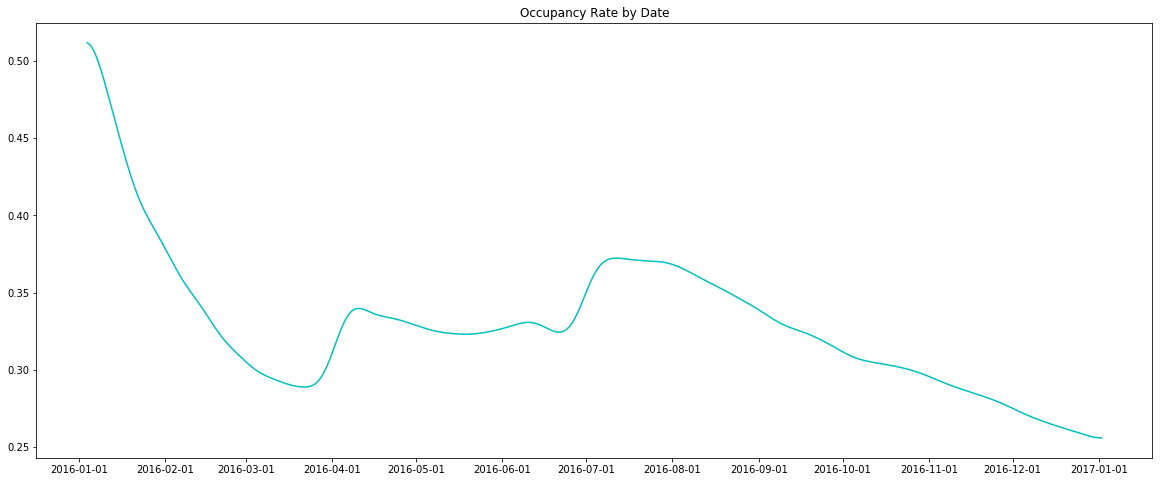

In [16]:
timeplot(ocp, 'occupancy', 'Occupancy Rate by Date')

The highest occupancy rate is in January 2016, and decreasing rapidly from 50% to 30% in 2 months. Then, it goes up slightly in the start of April and in the start of July separately. After that, it declines continuously.

It seems that spring and summer are the busy season. The best weather in Seattle is from late June to early September. And, in fact, there is a peak during that time.

However, it is weird to see the highest occupancy rate is in January 2016. It might be because any festivals. Or did the hotels change their price strategy to become more competitive? I don't know why.

### Seasonal Rental Price

In [17]:
# convert 'price' into float
cal['price'] = cal['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

#### Median of Price

In [18]:
pri_median = cal[['date', 'price']].groupby('date').median()

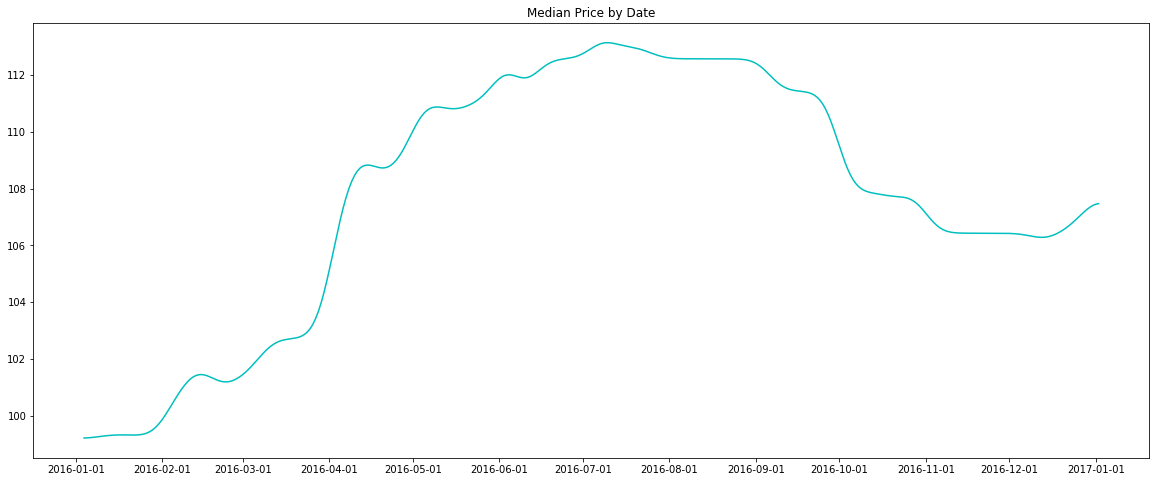

In [19]:
timeplot(pri_median, 'price', 'Median Price by Date')

Obviously, the rental price are higher from May to September. In that time, Seattle usually have nice weather. It makes sense that rental price in Rainy Day is cheaper.

In addition, the cheapest price is in in January 2016. It could be a reason for high occupancy, but I don't think it is enough to explain 50% occupancy rate in January.

#### Mean of Price

I believe the median of price shows the pattern of price better than mean, but it is ok to take a look at the mean.

In [20]:
pri_mean = cal[['date', 'price']].groupby('date').mean()

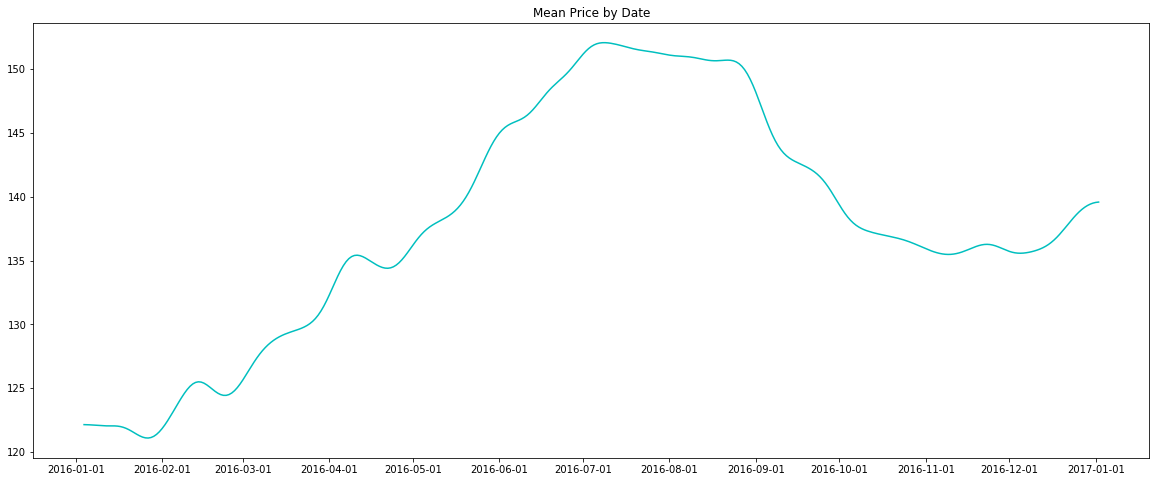

In [21]:
timeplot(pri_mean, 'price', 'Mean Price by Date')

It looks likes a little bit diffrence, but it still shows the same pattern.

## Popular Airbnb Homes

In [22]:
ocp = cal[['listing_id', 'available']].groupby('listing_id').mean()
ocp['occupancy'] = 1 - ocp['available']
ocp.drop(['available'], axis = 1, inplace=True)
ocp['id'] = ocp.index

In [23]:
ocp.head()

,occupancy,id
listing_id,,
3335,0.153425,3335
4291,0.000000,4291
5682,0.153425,5682
6606,0.000000,6606
7369,0.854795,7369


In [24]:
ocp.describe()

,occupancy,id
count,3818.000000,3.818000e+03
mean,0.329390,5.550111e+06
std,0.347322,2.962660e+06
min,0.000000,3.335000e+03
25%,0.013699,3.258256e+06
50%,0.156164,6.118244e+06
75%,0.660274,8.035127e+06
max,1.000000,1.034016e+07


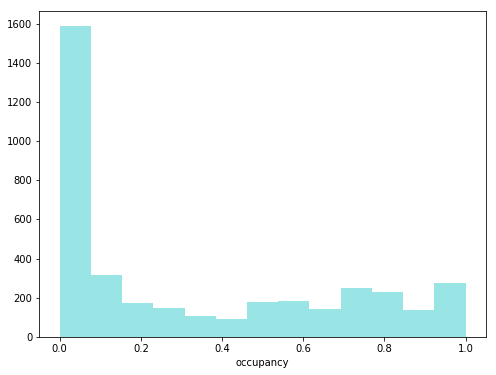

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(ocp['occupancy'], color='c', kde=False)
plt.show()

Let's define the Airbnb rooms whose occupancy rates are greater than or qeual to 70% are popular. 

In [26]:
threshold = 0.70

In [27]:
# join tables
data = pd.merge(ocp, lst, how='inner', left_on='id', right_on='id')

In [28]:
data.head()

,occupancy,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.153425,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,0.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,0.153425,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,0.000000,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,0.854795,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [29]:
def comparePlot(feat):
    """
    draw a plot to compare feature of popular and unpopular homes
    """
    
    plt.figure(figsize=(8,6))
        
    # if not float, draw bar plot
    if data[feat].dtype != np.float:
        # build a tempary DataFrame for using seaborn easily
        # includes 3 columns: occupancy, popularity and index
        cnt_popular = data[data['occupancy'] >= threshold][feat].value_counts()
        cnt_unpopular = data[data['occupancy'] < threshold][feat].value_counts()
        fre_popular = pd.DataFrame(cnt_popular / sum(cnt_popular))
        fre_popular['popularity'] = 'Popular'
        fre_popular['index'] = fre_popular.index
        fre_unpopular = pd.DataFrame(cnt_unpopular / sum(cnt_unpopular))
        fre_unpopular['popularity'] = 'Unpopular'
        fre_unpopular['index'] = fre_unpopular.index
        
        plot_data = pd.concat([fre_popular, fre_unpopular], ignore_index=True)
        sns.barplot(x='index', y=feat, hue='popularity', data=plot_data, palette='GnBu')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    # if float, draw kde line
    else:
        sns.kdeplot(data[feat][data['occupancy'] >= threshold], color='m')
        sns.kdeplot(data[feat][data['occupancy'] < threshold], color='c')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    
    plt.show()

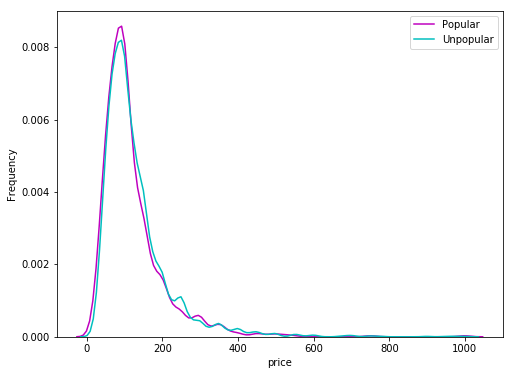

In [30]:
# price
data['price'] = data['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
comparePlot('price')

In general, the popular rooms have slightly cheaper price. It is commonsense that people always want to pay less.

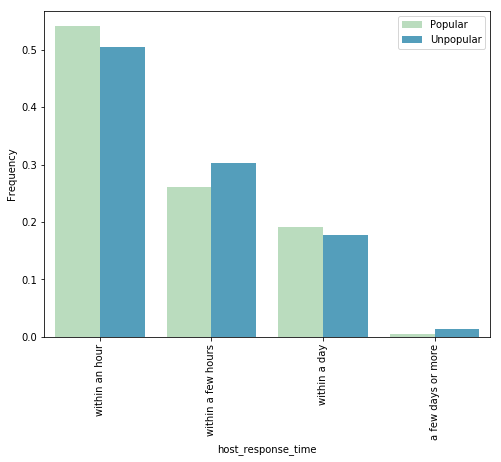

In [31]:
# host response time
comparePlot('host_response_time')

If host can respond sooner, they will have more chance to rent.

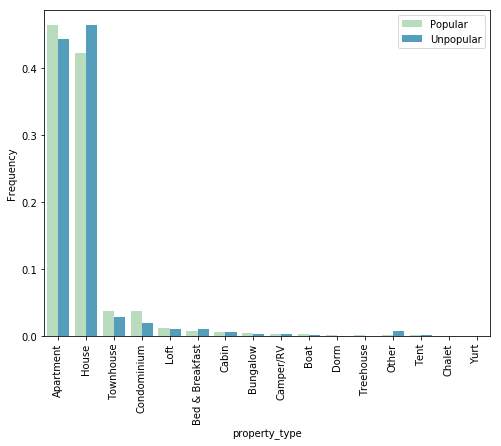

In [32]:
# property type
comparePlot('property_type')

We can see that houses are more unpopular.

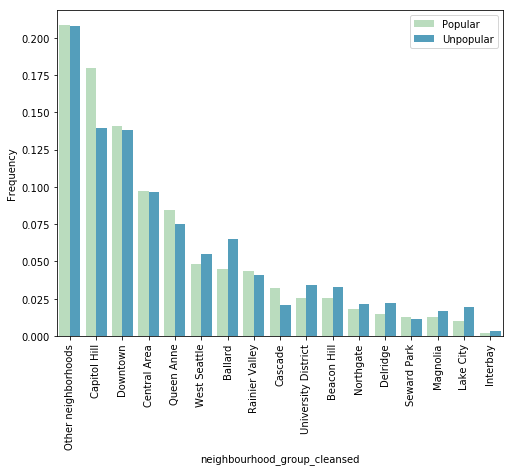

In [33]:
# neighbourhood
comparePlot('neighbourhood_group_cleansed')

Capital Hill is very popular.

Wikipedia says:

> Capitol Hill is a densely populated, residential district in Seattle, Washington, United States. It is one of the city's most prominent nightlife and entertainment districts and is the center of the city's LGBT and counterculture communities.

There is an interesting thing that Ballard is significantly unpopular.

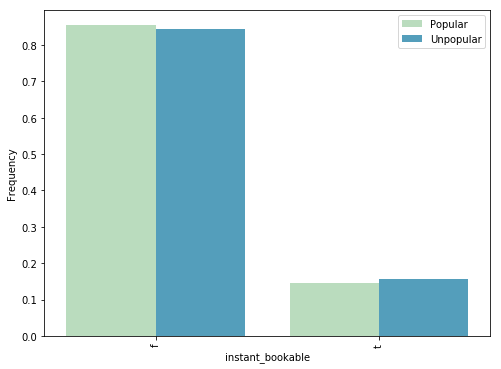

In [34]:
# booking
comparePlot('instant_bookable')

Whether the rooms can be booked instantly does not matter.

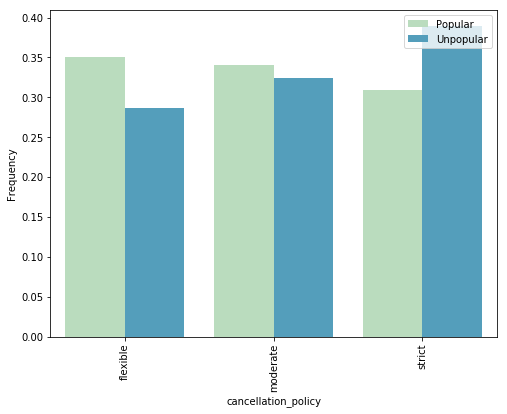

In [35]:
# cancellation policy
comparePlot('cancellation_policy')

More felxiable cancellation policy, more popular.

## Influencial Features

### Data Processing 

In [36]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#### Step 01: Dropping Useless Features

There are some kinds of useless data:

- not informative: id, url, name...
- although informative, but hard to deal with: text, latitude, longitude...
- values are identical: city, state...
- values are redundent: listing count, avaliability...
- not inner features: price, reveiw...

Just drop all of them

In [37]:
def drop(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data

In [38]:
# drop id
data_clean = drop(lst, 'id')
data_clean = drop(data_clean, 'scrape_id')
data_clean = drop(data_clean, 'host_id')
data_clean = drop(data_clean, 'host_verifications') 

for feat in data.columns:
    # drop url
    if 'url' in feat:
        data_clean = drop(data_clean, feat)
    # drop name
    if 'name' in feat:
        data_clean = drop(data_clean, feat)

Dropping id...
Dropping scrape_id...
Dropping host_id...
Dropping host_verifications...
Dropping listing_url...
Dropping name...
Dropping thumbnail_url...
Dropping medium_url...
Dropping picture_url...
Dropping xl_picture_url...
Dropping host_url...
Dropping host_name...
Dropping host_thumbnail_url...
Dropping host_picture_url...
Dropping jurisdiction_names...


In [39]:
# drop texts
data_clean = drop(data_clean, 'summary')
data_clean = drop(data_clean, 'space')
data_clean = drop(data_clean, 'description')
data_clean = drop(data_clean, 'neighborhood_overview')
data_clean = drop(data_clean, 'notes')
data_clean = drop(data_clean, 'transit')
data_clean = drop(data_clean, 'host_about')

Dropping summary...
Dropping space...
Dropping description...
Dropping neighborhood_overview...
Dropping notes...
Dropping transit...
Dropping host_about...


In [40]:
# drop identical features
for feat in data_clean.columns:
    if len(data_clean[feat].value_counts()) <= 1:
        data_clean = drop(data_clean, feat)

Dropping last_scraped...
Dropping experiences_offered...
Dropping market...
Dropping country_code...
Dropping country...
Dropping has_availability...
Dropping calendar_last_scraped...
Dropping requires_license...
Dropping license...


In [41]:
data_clean['city'].value_counts()

Seattle                  3810
Seattle                     2
West Seattle                2
Ballard, Seattle            1
seattle                     1
西雅图                         1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [42]:
data_clean['state'].value_counts()

WA    3817
wa       1
Name: state, dtype: int64

In [43]:
data_clean['smart_location'].value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
seattle, wa                     1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
Ballard, Seattle, WA            1
Name: smart_location, dtype: int64

We can see that all of them are in Seattle, WA

In [44]:
# drop identical features
data_clean = drop(data_clean, 'city')
data_clean = drop(data_clean, 'state')
data_clean = drop(data_clean, 'smart_location')

Dropping city...
Dropping state...
Dropping smart_location...


In [45]:
# only need 'neighbourhood_group_cleansed' as feature of home location
data_clean = drop(data_clean, 'street')
data_clean = drop(data_clean, 'neighbourhood')
data_clean = drop(data_clean, 'neighbourhood_cleansed')
data_clean = drop(data_clean, 'zipcode')
data_clean = drop(data_clean, 'latitude')
data_clean = drop(data_clean, 'longitude')

Dropping street...
Dropping neighbourhood...
Dropping neighbourhood_cleansed...
Dropping zipcode...
Dropping latitude...
Dropping longitude...


In [46]:
# for price, only keep price as label
data_clean = drop(data_clean, 'weekly_price')
data_clean = drop(data_clean, 'monthly_price')
data_clean = drop(data_clean, 'security_deposit')
data_clean = drop(data_clean, 'cleaning_fee')
data_clean = drop(data_clean, 'extra_people')

Dropping weekly_price...
Dropping monthly_price...
Dropping security_deposit...
Dropping cleaning_fee...
Dropping extra_people...


In [47]:
# drop all reviews
for feat in data_clean.columns:
    # drop url
    if 'review' in feat:
        data_clean = drop(data_clean, feat)

Dropping number_of_reviews...
Dropping first_review...
Dropping last_review...
Dropping review_scores_rating...
Dropping review_scores_accuracy...
Dropping review_scores_cleanliness...
Dropping review_scores_checkin...
Dropping review_scores_communication...
Dropping review_scores_location...
Dropping review_scores_value...
Dropping reviews_per_month...


In [48]:
# for listing count, only keep the calculated one
data_clean = drop(data_clean, 'host_listings_count')
data_clean = drop(data_clean, 'host_total_listings_count')

Dropping host_listings_count...
Dropping host_total_listings_count...


In [49]:
# keep only anual avaliability
data_clean = drop(data_clean, 'availability_30')
data_clean = drop(data_clean, 'availability_60')
data_clean = drop(data_clean, 'availability_90')

Dropping availability_30...
Dropping availability_60...
Dropping availability_90...


#### Step 02: Assess Missing Data

In [50]:
# investigate missing data in columns
NaN_rate_col = data_clean.isnull().sum().sort_values(ascending=False) / len(data_clean)

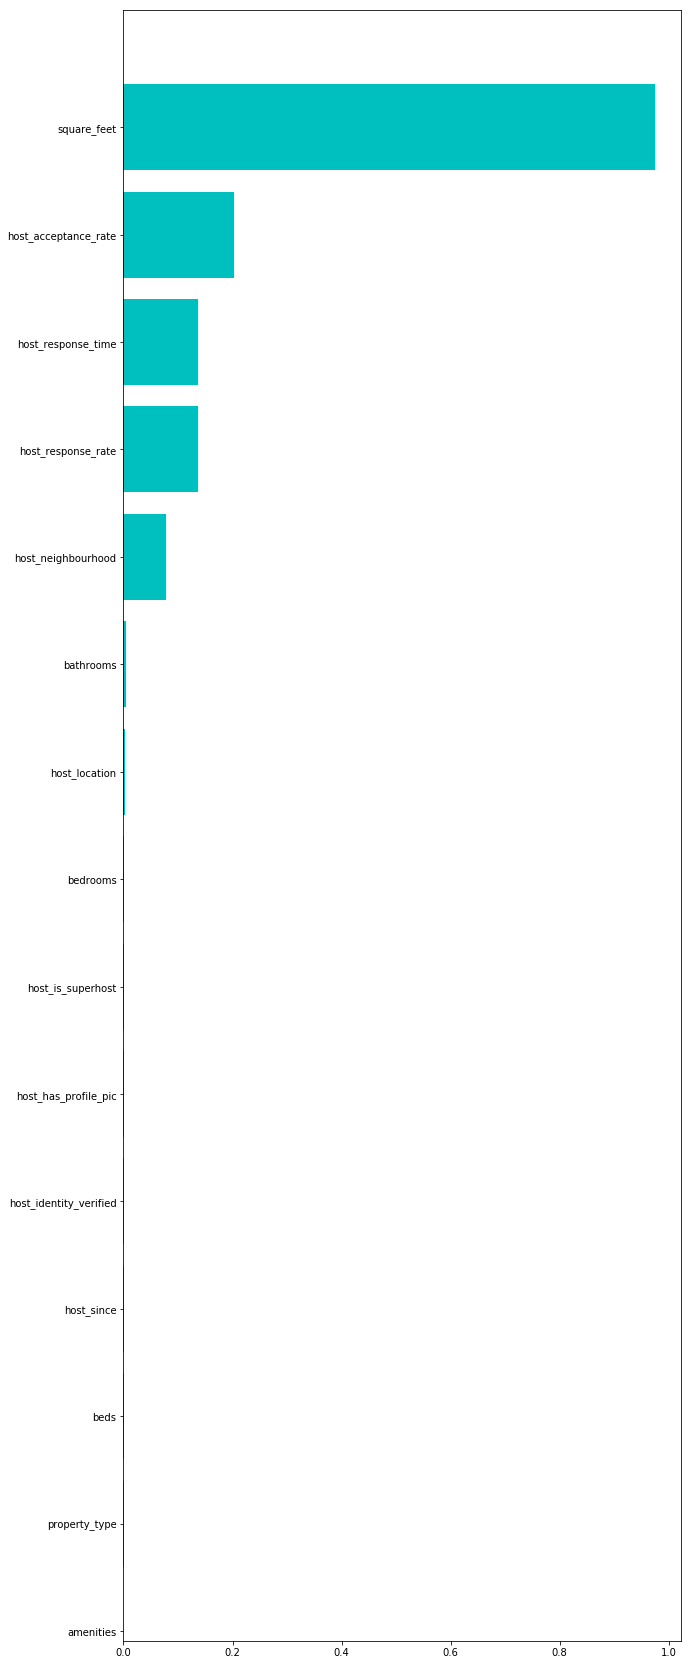

In [51]:
x = range(len(NaN_rate_col[NaN_rate_col != 0]))
y = NaN_rate_col[NaN_rate_col != 0]

plt.figure(figsize=(10,30))
ax = plt.subplot()

plt.gca().invert_yaxis()
ax.set_yticks(range(len(NaN_rate_col)))
ax.set_yticklabels(NaN_rate_col.index)

plt.barh(x, y, color='c')
plt.show()

In [52]:
# no missing label here
data_clean['price'].isnull().sum()

0

There is no missing on the label 'price'

In [53]:
# drop the feature whose missing portion are greater than 50%
for feat in NaN_rate_col.index:
    if NaN_rate_col[feat] > 0.5:
        data_clean = drop(data_clean, feat)

Dropping square_feet...


Drop square_feet because most of them are misssing

In [54]:
# investigate missing data in rows
data_clean['Missing_num'] = data_clean.isnull().sum(axis=1)
print('{:.2f}% rows have no missing data.'.format(len(data_clean[data_clean['Missing_num']==0]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 1 missing data.'.format(len(data_clean[data_clean['Missing_num']<=1]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 2 missing data.'.format(len(data_clean[data_clean['Missing_num']<=2]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 3 missing data.'.format(len(data_clean[data_clean['Missing_num']<=3]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 4 missing data.'.format(len(data_clean[data_clean['Missing_num']<=4]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 5 missing data.'.format(len(data_clean[data_clean['Missing_num']<=5]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 6 missing data.'.format(len(data_clean[data_clean['Missing_num']<=6]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 7 missing data.'.format(len(data_clean[data_clean['Missing_num']<=7]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 8 missing data.'.format(len(data_clean[data_clean['Missing_num']<=8]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 9 missing data.'.format(len(data_clean[data_clean['Missing_num']<=9]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 10 missing data.'.format(len(data_clean[data_clean['Missing_num']<=10]) / len(data_clean) * 100))

73.36% rows have no missing data.
85.12% rows have less than 1 missing data.
86.64% rows have less than 2 missing data.
98.59% rows have less than 3 missing data.
99.95% rows have less than 4 missing data.
99.95% rows have less than 5 missing data.
99.95% rows have less than 6 missing data.
99.95% rows have less than 7 missing data.
99.95% rows have less than 8 missing data.
100.00% rows have less than 9 missing data.
100.00% rows have less than 10 missing data.


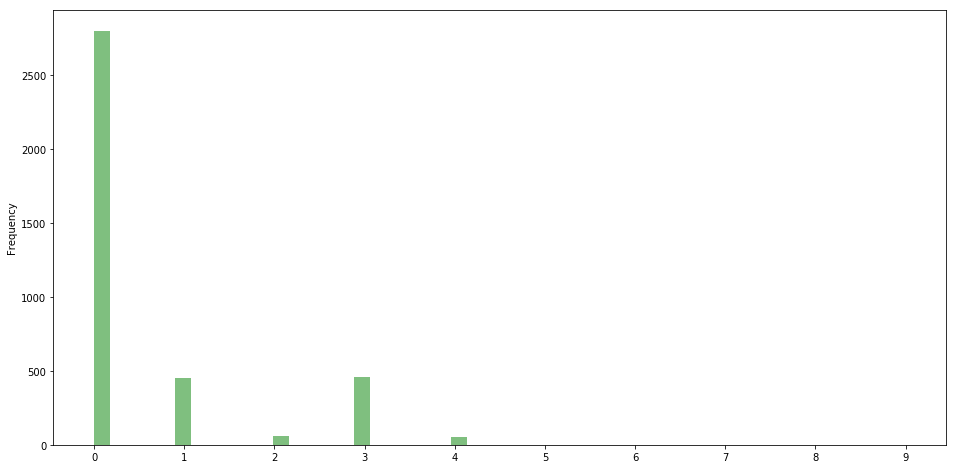

In [55]:
# show the distibution of missing data on row
plt.figure(figsize=(16,8))
plt.xticks(range(50))
data_clean['Missing_num'].plot.hist(color='g', alpha=0.5, bins=50)
plt.show()

In [56]:
# how many rows have 9 misssing values
len(data_clean[data_clean['Missing_num']==9])

2

99.95% rows have less than 4 missing data, and other 00.05% (only 2 rows) have 9 missing values

In [57]:
# drop rows has more than 4 missing values (the 2 rows with 9 missing values)
missing_threshold = 4
data_clean = data_clean[data_clean['Missing_num']<=missing_threshold].drop('Missing_num', axis = 1)

#### Step 03: Re-Encode Features

In [58]:
# convert continous data from str into float
data_clean['price'] = data_clean['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
data_clean['host_response_rate'] = data_clean['host_response_rate'].map(lambda rate: np.float(rate[:-1]) / 100, na_action='ignore')
data_clean['host_acceptance_rate'] = data_clean['host_acceptance_rate'].map(lambda rate: np.float(rate[:-1]) / 100, na_action='ignore')

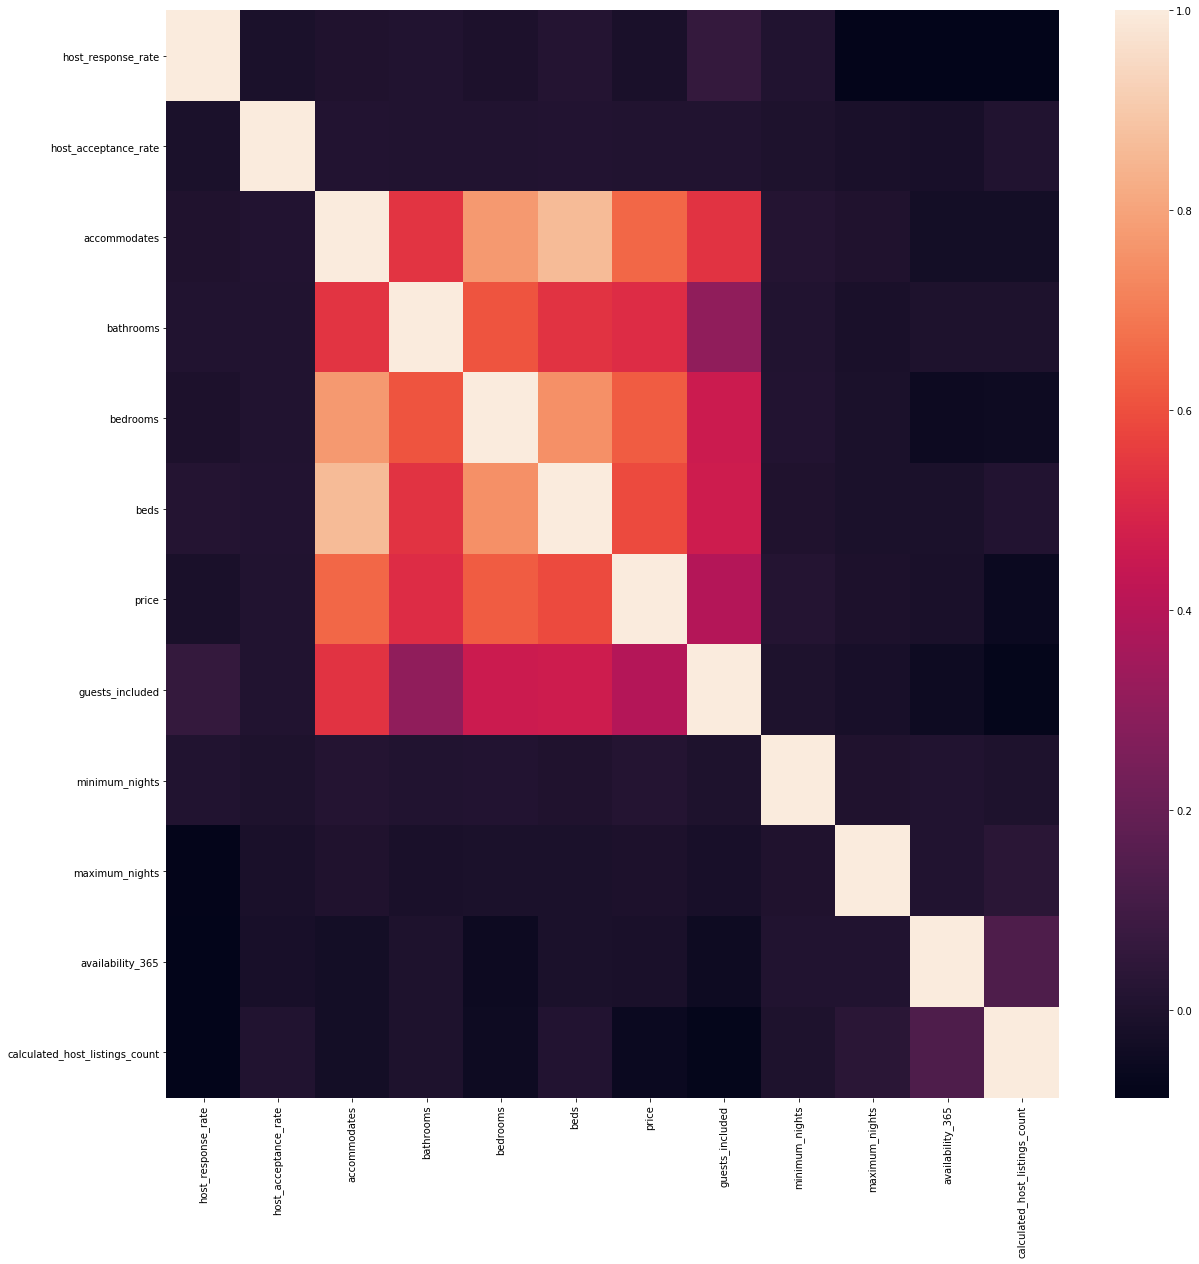

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(data_clean.corr())
plt.show()

In [60]:
def oneHot(feat, data):
    """
    encode an categorical data as one-hot
    """
    print('Ecoding {} as one-hot..'.format(feat))
    cur_dummies = pd.get_dummies(data[feat], prefix=feat)
    data.drop(feat, axis=1, inplace=True)
    data = pd.concat([data, cur_dummies], axis=1)
    return data

In [61]:
feats = []
conts = []
for feat in data_clean.columns:
    if data_clean[feat].dtype == np.float:
        print('{} is a continous varibale'.format(feat))
        # take a look which columns are float
        conts.append(feat)
    elif len(data_clean[feat].value_counts()) <= 5:
        # for categorical variables with small categories, encode them as one hot
        data_clean = oneHot(feat, data_clean)
    else:
        # if categorical variables have many distinct values, we should be more careful
        feats.append(feat)

Ecoding host_response_time as one-hot..
host_response_rate is a continous varibale
host_acceptance_rate is a continous varibale
Ecoding host_is_superhost as one-hot..
Ecoding host_has_profile_pic as one-hot..
Ecoding host_identity_verified as one-hot..
Ecoding is_location_exact as one-hot..
Ecoding room_type as one-hot..
bathrooms is a continous varibale
bedrooms is a continous varibale
beds is a continous varibale
Ecoding bed_type as one-hot..
price is a continous varibale
Ecoding instant_bookable as one-hot..
Ecoding cancellation_policy as one-hot..
Ecoding require_guest_profile_picture as one-hot..
Ecoding require_guest_phone_verification as one-hot..


In [62]:
# there are some continouns variables
print(conts)

['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'price']


In [63]:
# there are some variables we should pay more attention on
print(feats)

['host_since', 'host_location', 'host_neighbourhood', 'neighbourhood_group_cleansed', 'property_type', 'accommodates', 'amenities', 'guests_included', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_365', 'calculated_host_listings_count']


In [64]:
data_clean['host_since'].head()

0    2011-08-11
1    2013-02-21
2    2014-06-12
3    2013-11-06
4    2011-11-29
Name: host_since, dtype: object

In [65]:
data_clean['host_since'] = data_clean['host_since'].map(lambda date: 2015 - int(date[:4]), na_action='ignore')

In [66]:
data_clean['host_since'].value_counts()

 0    981
 1    900
 2    776
 3    539
 4    398
 5    149
 6     64
-1      5
 7      4
Name: host_since, dtype: int64

In [67]:
data_clean = oneHot('host_since', data_clean)

Ecoding host_since as one-hot..


In [68]:
data_clean['host_location'].value_counts()

Seattle, Washington, United States                             3259
US                                                              246
Spokane, Washington, United States                               41
Kent, Washington, United States                                  34
Los Angeles, California, United States                           13
Bellevue, Washington, United States                              12
San Francisco, California, United States                         11
Mercer Island, Washington, United States                         10
Kirkland, Washington, United States                               8
New York, New York, United States                                 6
Sammamish, Washington, United States                              5
Seattle                                                           5
Vashon, Washington, United States                                 5
Shoreline, Washington, United States                              5
Seattle, Washington                             

so many different location here, drop it

In [69]:
data_clean = drop(data_clean, 'host_location')

Dropping host_location...


In [70]:
data_clean['host_neighbourhood'].value_counts()

Capitol Hill                 405
Belltown                     254
Ballard                      210
Minor                        191
Queen Anne                   189
Fremont                      147
Wallingford                  134
North Beacon Hill            101
Ravenna                      100
Central Business District     93
Stevens                       87
First Hill                    85
University District           80
Greenwood                     80
Lower Queen Anne              75
Columbia City                 61
Green Lake                    55
North Admiral                 53
Magnolia                      53
Phinney Ridge                 52
Atlantic                      49
Leschi                        46
Mount Baker                   44
Eastlake                      42
Maple Leaf                    40
Madrona                       40
The Junction                  39
Roosevelt                     32
Pike Place Market             31
Genesee                       30
          

So many different neighbourhood here. Also the neighbourhood of host seems to make no sense. Drop it

In [71]:
# so many different neighbourhood here, drop it
data_clean = drop(data_clean, 'host_neighbourhood')

Dropping host_neighbourhood...


In [72]:
data_clean['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               528
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

The size is ok, and I assume neighbourhood of home is imformative

In [73]:
data_clean = oneHot('neighbourhood_group_cleansed', data_clean)

Ecoding neighbourhood_group_cleansed as one-hot..


In [74]:
data_clean['property_type'].value_counts()

House              1733
Apartment          1706
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

Size of category is acceptable, encode it as one-hot

In [75]:
data_clean = oneHot('property_type', data_clean)

Ecoding property_type as one-hot..


In [76]:
data_clean['calendar_updated'].value_counts()

today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     280
a week ago       247
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
12 months ago      5
11 months ago      5
13 months ago      2
22 months ago      2
14 months ago      1
30 months ago      1
15 months ago      1
17 months ago      1
16 months ago      1
Name: calendar_updated, dtype: int64

Too many different calendar updated here, drop it

In [77]:
data_clean = drop(data_clean, 'calendar_updated')

Dropping calendar_updated...


'amenities' column is unstructured. Build a set of binary variables to record whether the room has certain amenities.

In [78]:
data_clean['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

In [79]:
# convert it into python list
data_clean['amenities'] = data_clean['amenities'].map(lambda amenities: amenities[1:-1].replace('"', '').split(','))

In [80]:
# check if it become better
data_clean['amenities'].head()

0    [TV, Cable TV, Internet, Wireless Internet, Ai...
1    [TV, Internet, Wireless Internet, Kitchen, Fre...
2    [TV, Cable TV, Internet, Wireless Internet, Ai...
3    [Internet, Wireless Internet, Kitchen, Indoor ...
4    [TV, Cable TV, Internet, Wireless Internet, Ki...
Name: amenities, dtype: object

In [81]:
# to see how many different amenities there are
amenities = set()
for a in data_clean['amenities']:
    amenities |= set(a)
print(len(a))
print(a)

22
['TV', 'Cable TV', 'Internet', 'Wireless Internet', 'Kitchen', 'Free Parking on Premises', 'Pets live on this property', 'Dog(s)', 'Elevator in Building', 'Hot Tub', 'Indoor Fireplace', 'Buzzer/Wireless Intercom', 'Heating', 'Family/Kid Friendly', 'Washer', 'Dryer', 'Smoke Detector', 'Essentials', 'Shampoo', 'Hangers', 'Iron', 'Laptop Friendly Workspace']


In [82]:
# create new bainary columns if one amentity exist
for a in amenities:
    data_clean[a] = data_clean['amenities'].apply(lambda amenities: 1 if a in amenities else 0)
# do not forget to drop orignal columns
data_clean = drop(data_clean, 'amenities')

Dropping amenities...


In [83]:
data_clean.describe()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,...,Wireless Internet,Shampoo,Essentials,Pool,Laptop Friendly Workspace,Suitable for Events,Dryer,24-Hour Check-in,First Aid Kit,TV
count,3295.000000,3045.000000,3816.000000,3800.000000,3810.000000,3815.000000,3816.000000,3816.000000,3816.000000,3816.000000,...,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000,3816.000000
mean,0.948868,0.999672,3.350105,1.259605,1.308136,1.735780,127.951782,1.672956,2.369759,780.558438,...,0.960430,0.699423,0.848008,0.041667,0.194969,0.054507,0.784853,0.161164,0.440252,0.674004
std,0.118667,0.018122,1.977876,0.590494,0.883359,1.139654,90.250833,1.311293,16.310159,1683.975176,...,0.194973,0.458569,0.359060,0.199853,0.396228,0.227046,0.410978,0.367730,0.496482,0.468807
min,0.170000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.980000,1.000000,2.000000,1.000000,1.000000,1.000000,75.000000,1.000000,1.000000,60.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000,1125.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,2.000000,1125.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,16.000000,8.000000,7.000000,15.000000,1000.000000,15.000000,1000.000000,100000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Step 04: Fill Missing Value

In [84]:
# Check if NaN exist
data_clean.isnull().sum().sum()

1315

Now there are still some missing values remained.

Since all of non-float columns have done, all of the missings are continous. We can fill them with mean or median to impute it.

I decide to use median because it is more robust (Free from the influence of outlier).

In [85]:
# fill missing value with median
for feat in data_clean.columns:
    data_clean[feat].fillna(data_clean[feat].median(), inplace=True)

In [86]:
# Check if NaN exist
data_clean.isnull().sum().sum()

0

#### Step 05: Feature Feature Scaling

In [87]:
from sklearn import preprocessing as p
scaler = p.StandardScaler()
columns = data_clean.columns
data_clean = scaler.fit_transform(data_clean)
data_clean = pd.DataFrame(data_clean)
data_clean.columns = columns

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [88]:
data_clean.head()

,host_response_rate,host_acceptance_rate,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,...,Wireless Internet,Shampoo,Essentials,Pool,Laptop Friendly Workspace,Suitable for Events,Dryer,24-Hour Check-in,First Aid Kit,TV
0,0.037181,0.01619,0.328625,-0.438598,-0.348562,-0.645582,-0.475978,0.249438,-0.083993,-0.246805,...,0.202979,-1.525431,-2.362056,-0.208514,-0.492125,-0.240103,0.523568,-0.438323,-0.886858,0.695464
1,0.216326,0.01619,0.328625,-0.438598,-0.348562,-0.645582,0.244331,-0.513268,-0.022673,-0.410130,...,0.202979,-1.525431,0.423360,-0.208514,-0.492125,-0.240103,0.523568,-0.438323,1.127576,0.695464
2,-2.560422,0.01619,3.868239,5.499479,4.183336,4.620267,9.386719,6.351088,0.099966,-0.445765,...,0.202979,0.655552,0.423360,-0.208514,-0.492125,-0.240103,0.523568,-0.438323,-0.886858,0.695464
3,0.395471,0.01619,-0.177034,-0.438598,-1.481536,0.232060,-0.309753,-0.513268,-0.083993,0.204568,...,0.202979,0.655552,0.423360,-0.208514,-0.492125,-0.240103,0.523568,-0.438323,-0.886858,-1.437889
4,0.395471,0.01619,1.339943,1.257995,1.917387,1.109701,3.568836,3.300263,-0.083993,0.204568,...,0.202979,0.655552,0.423360,-0.208514,-0.492125,-0.240103,-1.909971,-0.438323,1.127576,0.695464


### Model Training 

#### Step 01: Data Splitting 

In [89]:
X = drop(data_clean, 'price')
y = data_clean['price']

Dropping price...


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)

#### Step 02: Modeling and Evaluation

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

def train(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print('For training data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print('For test data, mean squared error: {:.4f}, R2: {:.4f}'.format(mse, r2))

In [92]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr)

For training data, mean squared error: 0.3702, R2: 0.6064
For test data, mean squared error: 10194473176012126580375552.0000, R2: -8242749551697516075941888.0000


In [93]:
# ridge regression
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha=0.5)
train(rr1)

For training data, mean squared error: 0.3698, R2: 0.6069
For test data, mean squared error: 0.5179, R2: 0.5813


In [94]:
rr2 = Ridge(alpha=0.1)
train(rr2)

For training data, mean squared error: 0.3698, R2: 0.6069
For test data, mean squared error: 0.5181, R2: 0.5811


In [95]:
rr3 = Ridge(alpha=0.05)
train(rr3)

For training data, mean squared error: 0.3698, R2: 0.6069
For test data, mean squared error: 0.5181, R2: 0.5811


In [96]:
# lasso regression
from sklearn.linear_model import Lasso
lasso1 = Lasso(alpha=0.1)
train(lasso1)

For training data, mean squared error: 0.4643, R2: 0.5064
For test data, mean squared error: 0.6291, R2: 0.4913


In [97]:
lasso2 = Lasso(alpha=0.01)
train(lasso2)

For training data, mean squared error: 0.3801, R2: 0.5958
For test data, mean squared error: 0.5216, R2: 0.5782


In [98]:
lasso3 = Lasso(alpha=0.001)
train(lasso3)

For training data, mean squared error: 0.3700, R2: 0.6066
For test data, mean squared error: 0.5163, R2: 0.5826


rr1 is my best model

#### Step 03: Feature Importance

In [99]:
coef = rr2.coef_
# to get the order of index
ind = np.argsort(-abs(coef))

In [100]:
X.columns[ind][:30]

Index(['bedrooms', 'property_type_House', 'accommodates',
       'host_response_time_within an hour', 'property_type_Apartment',
       'bathrooms', 'room_type_Entire home/apt',
       'host_response_time_within a few hours',
       'host_response_time_within a day', 'room_type_Shared room',
       'neighbourhood_group_cleansed_Downtown', 'property_type_Townhouse',
       'room_type_Private room', 'neighbourhood_group_cleansed_Capitol Hill',
       'Doorman', 'neighbourhood_group_cleansed_Rainier Valley',
       'property_type_Bed & Breakfast', 'property_type_Loft',
       'property_type_Condominium', 'availability_365',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'Elevator in Building', 'neighbourhood_group_cleansed_Delridge',
       'property_type_Cabin', 'property_type_Camper/RV', 'Hangers',
       'property_type_Bungalow', 'guests_included'],
      dtype='object'

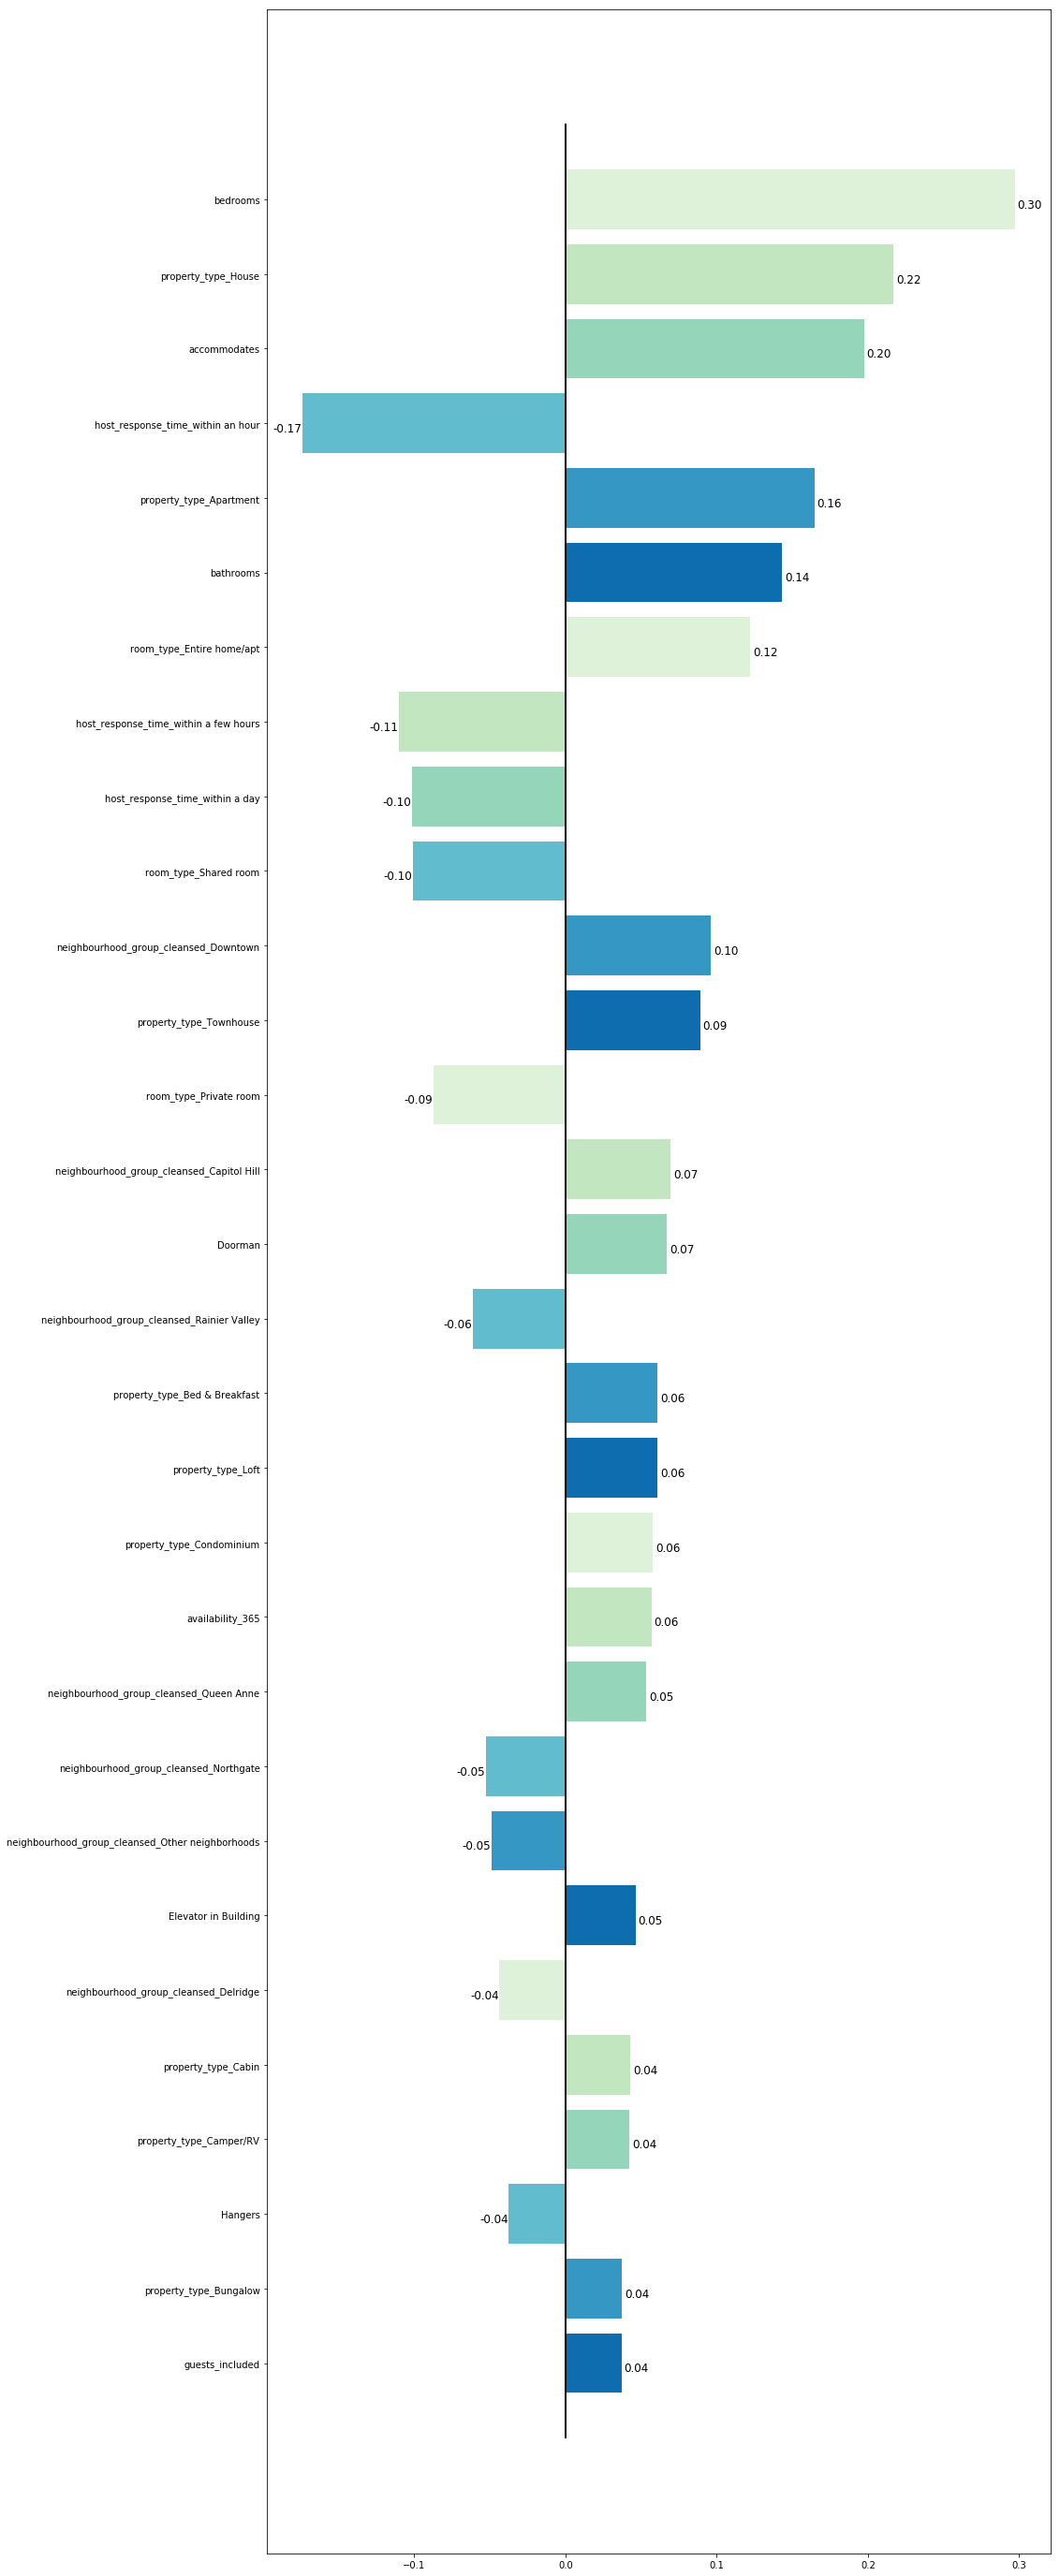

In [101]:
# draw a bar plot with coefficeint of features in desending order of absolute value
x = range(30)
y = coef[ind][:30]
    
plt.figure(figsize=(15,50))
ax = plt.subplot()
    
# draw a vertical black line in the middle
plt.plot([0] * (32), range(-1,31), 'k', linewidth=2)

# invert y axis
plt.gca().invert_yaxis()
ax.set_yticks(x)
ax.set_yticklabels(X.columns[ind][:30])

plt.barh(x, y, color=sns.color_palette('GnBu'))

# adjust position
for rect, label in zip(ax.patches, y):
    if label >= 0:
        width = rect.get_width() + 0.01
    else:
        width = rect.get_width() - 0.01
    label = '{:.2f}'.format(label)
    ax.text(width, rect.get_y()+0.55, label, ha='center', va='bottom', fontsize=12)
    
plt.show()

Obvious, the number of bedrooms and bathrooms, neighborhood and type of properties are the most influential features.